In [46]:
import numpy as np
import pandas as pd
import ast
import os
from pathlib import Path
from modeling_parameters.config import (
    PRIM_PARTICLE, 
    THETA,
    COORDINATES_PATH,
    RECONSTRUCTION_GEANT_OUTPUT_DIR,
    MATPLOTLIBRC_PATH,
    CENTRAL_STATIONS,
)


import matplotlib as mpl
mpl.rc_file(MATPLOTLIBRC_PATH)
import matplotlib.pyplot as plt
import seaborn as sns

from modeling_parameters.reconstruction.geant.functions import(
     compute_r,
     rho_model,
)

from functions import (
    plot_two_distributions_by_name,
    plot_single_distribution_by_name,
)

In [53]:
coordinates_df = pd.read_csv(COORDINATES_PATH)

X_det = np.array(coordinates_df['X'])
Y_det = np.array(coordinates_df['Y'])
Z_det = np.array(coordinates_df['Z'])

In [48]:
folder_path = Path(RECONSTRUCTION_GEANT_OUTPUT_DIR)
files = sorted(f for f in folder_path.iterdir() if f.is_file())

def get_file_by_index(index):
    if 0 <= index < len(files):
        return files[index]
    else:
        return None  

index = 1
file = get_file_by_index(index)

if file is not None:
    print(f"Файл с индексом {index}: {file}")
else:
    print(f"Нет файла с индексом {index}")
file_name = file .stem 
E = int(file_name.split('p')[1][:2]) 

Файл с индексом 1: d:\github\repositories\sdf\modeling_parameters\reconstruction\geant\output\p30\p1530_reconstruction.csv


In [49]:
file

WindowsPath('d:/github/repositories/sdf/modeling_parameters/reconstruction/geant/output/p30/p1530_reconstruction.csv')

In [50]:
df = pd.read_csv(file)
df.head(1)

,theta,phi,X0,Y0,Ne,s,r,rho,mask,worked_clusters,worked_stations,X0_opt,Y0_opt,Ne_opt,s_opt,loss
0,30.0,94.25482,-11.919572,15.444193,88465.35,1.410831,"[19.22093748864834, 29.04373527434818, 36.1334...","[18.2806587800747, 7.660444189862506, 8.888114...","[True, True, True, True, True, True, True, Tru...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-12.237106,7.441362,77917.631068,1.055314,0.253556


In [61]:
df['r'] = df['r'].apply(ast.literal_eval)
df['rho'] = df['rho'].apply(ast.literal_eval)
df['mask'] = df['mask'].apply(ast.literal_eval)
df['worked_clusters'] = df['worked_clusters'].apply(ast.literal_eval)
df['worked_stations'] = df['worked_stations'].apply(ast.literal_eval)

ValueError: malformed node or string: [19.22093748864834, 29.04373527434818, 36.133433805921726, 28.73236843205849, 18.380834238722247, 28.24352678691113, 25.217666707913416, 13.042509497498385, 22.08443024654396, 12.691036167917503, 33.69970982233035, 38.07681909116053, 49.56625357008022, 34.76894401852332, 38.61387375350942, 52.28488164845473, 55.873933667055944, 43.60046145909629, 36.66750607743968, 50.653933891880286, 65.3775367743406, 63.58391629610199, 75.9280202019612, 77.41811912660454, 32.751540775816515, 43.284069218792105, 33.776573502089136, 23.13168781399727, 61.0489902583139, 48.18447579337075, 57.014578091417256, 68.353924467327, 43.294836139755915, 48.411459914386974, 59.007780596408054, 54.84847010711439]

In [ ]:
theta = np.array(df['theta'])
phi = np.array(df['phi'])

In [64]:
X = np.array(df['X0'])
X_opt = np.array(df['X0_opt'])

Y = np.array(df['Y0'])
Y_opt = np.array(df['Y0_opt'])

Ne = np.array(df['Ne'])
Ne_opt = np.array(df['Ne_opt'])

s = np.array(df['s'])
s_opt = np.array(df['s_opt'])

rho = np.array(df['rho'])
loss = np.array(df['loss'])

In [73]:
r = []
r_opt = []

for i in range(len(X)):
    r.append(compute_r(X[i], Y[i], -18, theta[i], phi[i], X_det, Y_det, Z_det))
    r_opt.append(compute_r(X_opt[i], Y_opt[i], -18, theta[i], phi[i], X_det, Y_det, Z_det))

r = np.array(r)
r_opt = np.array(r_opt)


In [74]:
def is_top4_central(row):
    worked_stations = row['worked_stations']
    rho = row['rho']
    stations_rho = list(zip(worked_stations, rho))
    stations_rho_sorted = sorted(stations_rho, key=lambda x: x[1], reverse=True)
    
    top4_stations = [station for station, _ in stations_rho_sorted[:4]]
    return all(station in CENTRAL_STATIONS for station in top4_stations)

top4c_df = df[df.apply(is_top4_central, axis=1)]

In [75]:
top4c_mask = df.apply(is_top4_central, axis=1)

t4c_X = np.array(top4c_df['X0'])
t4c_X_opt = np.array(top4c_df['X0_opt'])

t4c_Y = np.array(top4c_df['Y0'])
t4c_Y_opt = np.array(top4c_df['Y0_opt'])

t4c_Ne = np.array(top4c_df['Ne'])
t4c_Ne_opt = np.array(top4c_df['Ne_opt'])

t4c_s = np.array(top4c_df['s'])
t4c_s_opt = np.array(top4c_df['s_opt'])

t4c_r = r[top4c_mask]
t4c_r_opt = r_opt[top4c_mask]

t4c_rho = np.array(top4c_df['rho'])
t4c_loss = np.array(top4c_df['loss'])

In [79]:
r = np.concatenate(r)
r_opt = np.concatenate(r_opt)

t4c_r = np.concatenate(t4c_r)
t4c_r_opt = np.concatenate(t4c_r_opt)

In [80]:
arrays = {
    'X': X,
    'X_opt': X_opt,
    'Y': Y,
    'Y_opt': Y_opt,
    'Ne': Ne,
    'Ne_opt': Ne_opt,
    's': s,
    's_opt': s_opt,
    'r': r,
    'r_opt': r_opt,
    
    'rho': rho,
    'loss': loss,
    
    't4c_X': t4c_X,
    't4c_X_opt': t4c_X_opt,
    't4c_Y': t4c_Y,
    't4c_Y_opt': t4c_Y_opt,
    't4c_Ne': t4c_Ne,
    't4c_Ne_opt': t4c_Ne_opt,
    't4c_s': t4c_s,
    't4c_s_opt': t4c_s_opt,
    't4c_r': t4c_r,
    't4c_r_opt': t4c_r_opt,
    
    't4c_rho': t4c_rho,
    't4c_loss': t4c_loss,
}

In [ ]:
limit = 35
save = False

In [96]:
plot_single_distribution_by_name(arrays, 'r', E, limit, save)

График сохранён в d:\github\repositories\sdf\modeling_parameters\reconstruction\notebooks\plots\geant\p30\E15\delta_r_1.png


In [97]:
plot_two_distributions_by_name(arrays, 'r', E, limit, save)

График сохранён в d:\github\repositories\sdf\modeling_parameters\reconstruction\notebooks\plots\geant\p30\E15\delta_r_2.png


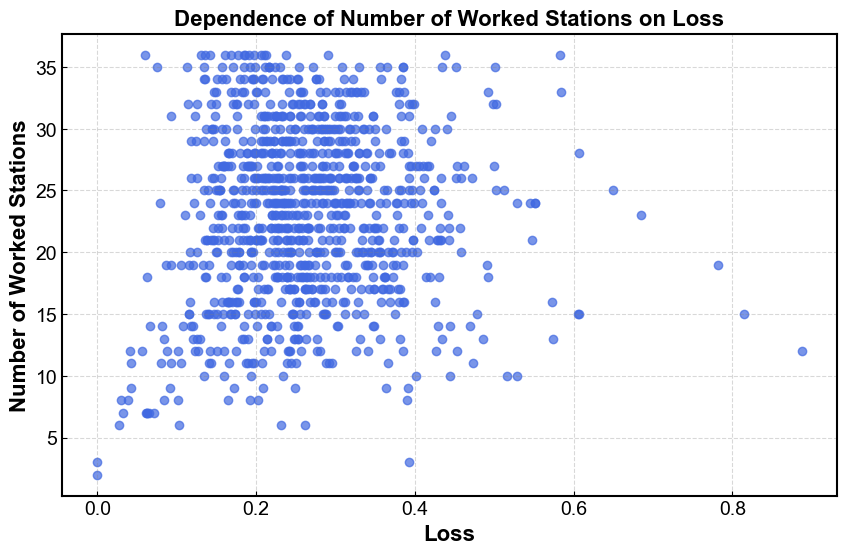

In [14]:
stations_count = np.array([len(stations) for stations in df['worked_stations']])

loss = np.array(df['loss'])


plt.figure(figsize=(10, 6))

plt.scatter(loss, stations_count, color='royalblue', alpha=0.7)

plt.xlabel('Loss')
plt.ylabel('Number of Worked Stations')
plt.title('Dependence of Number of Worked Stations on Loss')

plt.grid(True)

plt.show()

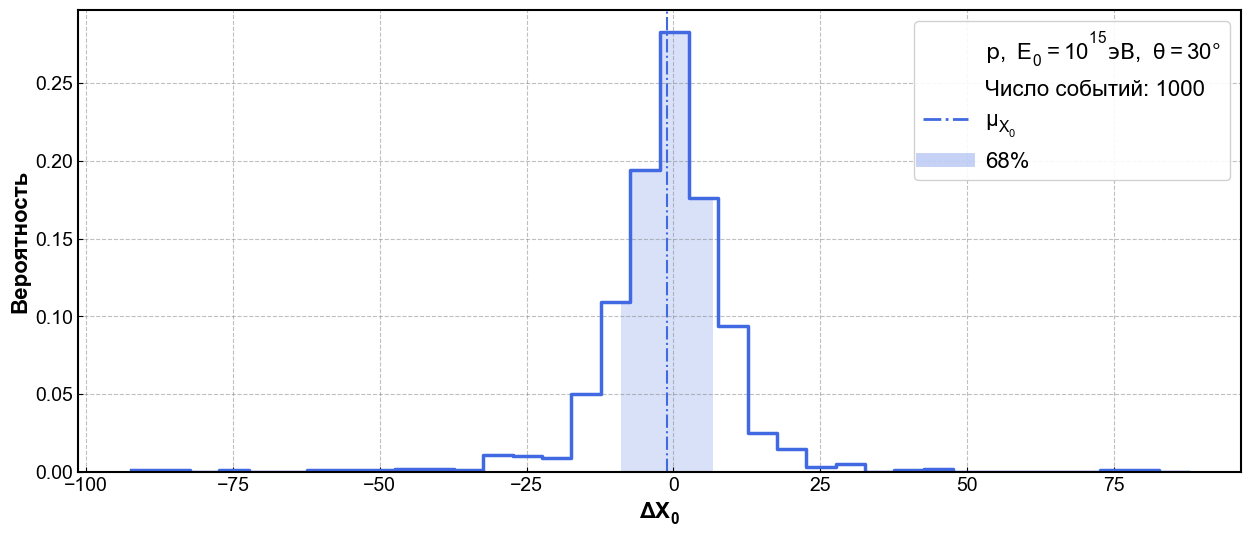

In [15]:
diff = df['X0_opt'] - df['X0']
mean = diff.mean()

abs_dev = np.abs(diff - mean)
maxabs = max(abs_dev)
radius = np.percentile(abs_dev, 68)
lower = mean - radius
upper = mean + radius

fig, ax = plt.subplots(figsize=(15, 6))
bin_width = 5
bins = np.arange(-maxabs - bin_width - 1, maxabs + bin_width + 1, bin_width)

hist = sns.histplot(
    diff,
    bins=bins,
    kde=False,
    color='royalblue',
    stat='probability',
    element='step',
    fill=False,
    linewidth=2.5
)

counts, bin_edges, _ = plt.hist(
    diff,
    bins=bins,
    weights=np.ones_like(diff)/len(diff),
    alpha=0
)

for i in range(len(bin_edges)-1):
    bin_start, bin_end = bin_edges[i], bin_edges[i+1]
    
    if bin_end <= lower or bin_start >= upper:
        continue
        
    fill_start = max(bin_start, lower)
    fill_end = min(bin_end, upper)
    
    plt.fill_between(
        [fill_start, fill_end],
        [0, 0],
        [counts[i], counts[i]],
        color='royalblue',
        alpha=0.2,
        edgecolor='none'
    )


plt.axvline(mean, color='royalblue', linestyle='-.', label=f'Среднее = {mean:.1f}')
legend_elements = [
    plt.Line2D([0], [0], color='none', label=rf'$\mathrm{{{PRIM_PARTICLE}}},\ E_0 = 10^{{{E}}}\text{{эВ}},\ \theta = {THETA}\degree$'),  
    plt.Line2D([0], [0], color='none', label = f'Число событий: {len(df)}'),  
    plt.Line2D([0], [0], color='royalblue', linestyle='-.', lw=2, label=r'$\mu_{X_0}$'),
    plt.Line2D([0], [0], color='royalblue', alpha=0.3, lw=10, label=r'68%'),
]

plt.ylabel('Вероятность')
plt.xlabel(r'$\Delta X_0$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, None)

ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)
plt.show()

In [16]:
def get_symmetric_range(data):
    mean = data.mean()
    abs_dev = np.abs(data - mean)
    radius = np.percentile(abs_dev, 68)
    return mean - radius, mean + radius

lower_all, upper_all = get_symmetric_range(df['X0_opt'] - df['X0'])
lower_top4, upper_top4 = get_symmetric_range(top4central_df['X0_opt'] - top4central_df['X0'])

abs_dev = np.abs(diff - mean)
maxabs = max(abs_dev)
bin_width = 5
bins = np.arange(-maxabs - bin_width - 1, maxabs + bin_width + 1, bin_width)

fig, ax = plt.subplots(figsize=(15, 6))

hist_all = sns.histplot(
    df['X0_opt'] - df['X0'],
    bins=bins,
    kde=False,
    color='royalblue',
    stat='probability',
    element='step',
    fill=False,
    linewidth=2.5,
    linestyle='-',
    ax=ax,
    label='All events'
)

hist_top4 = sns.histplot(
    top4central_df['X0_opt'] - top4central_df['X0'],
    bins=bins,
    kde=False,
    color='crimson',
    stat='probability',
    element='step',
    fill=False,
    linewidth=2.5,
    linestyle='-',
    ax=ax,
    label='Top4 Central'
)

counts_all, bin_edges_all, _ = plt.hist(
    df['X0_opt'] - df['X0'],
    bins=bins,
    weights=np.ones_like(df['X0_opt'] - df['X0'])/len(df['X0_opt'] - df['X0']),
    alpha=0
)

counts_top4, bin_edges_top4, _ = plt.hist(
    top4central_df['X0_opt'] - top4central_df['X0'],
    bins=bins,
    weights=np.ones_like(top4central_df['X0_opt'] - top4central_df['X0'])/len(top4central_df['X0_opt'] - top4central_df['X0']),
    alpha=0
)

for i in range(len(bin_edges_all)-1):
    bin_start, bin_end = bin_edges_all[i], bin_edges_all[i+1]
    if bin_end <= lower_all or bin_start >= upper_all:
        continue
    fill_start = max(bin_start, lower_all)
    fill_end = min(bin_end, upper_all)
    plt.fill_between(
        [fill_start, fill_end],
        [0, 0],
        [counts_all[i], counts_all[i]],
        color='royalblue',
        alpha=0.2,
        edgecolor='none'
    )

for i in range(len(bin_edges_top4)-1):
    bin_start, bin_end = bin_edges_top4[i], bin_edges_top4[i+1]
    if bin_end <= lower_top4 or bin_start >= upper_top4:
        continue
    fill_start = max(bin_start, lower_top4)
    fill_end = min(bin_end, upper_top4)
    plt.fill_between(
        [fill_start, fill_end],
        [0, 0],
        [counts_top4[i], counts_top4[i]],
        color='crimson',
        alpha=0.2,
        edgecolor='none'
    )

plt.axvline((df['X0_opt'] - df['X0']).mean(), color='royalblue', linestyle='-.', label=r'$\mu_{\text{X0, all}}$')
plt.axvline((top4central_df['X0_opt'] - top4central_df['X0']).mean(), color='crimson', linestyle='-.', label=r'$\mu_{\text{X0, central}}$')

# Легенда
legend_elements = [
    plt.Line2D([0], [0], color='none', label=rf'$\mathrm{{{PRIM_PARTICLE}}},\ E_0 = 10^{{{E}}}\text{{эВ}},\ \theta = {THETA}\degree$'),  
    plt.Line2D([0], [0], color='none', label=r'$C \subset S$ - центр. станции'),
    plt.Line2D([0], [0], color='none', label=r'top4c: $\text{argmax}^{(4)}_{\substack{i \in S}} \rho_i \subset C $'),  
      
    plt.Line2D([0], [0], color='none', label=f'число t4c: {len(top4central_df)}/{len(df)}'),
    plt.Line2D([0], [0], color='royalblue', lw=2, label=r'все события'),
    plt.Line2D([0], [0], color='crimson', lw=2, label=r't4c события'),
    plt.Line2D([0], [0], color='crimson', linestyle='-.', lw=2, label=r'$\mu_{\Delta X_0}$'),
    plt.Line2D([0], [0], color='crimson', alpha=0.2, lw=10, label='68% central'),
]

plt.ylabel('Вероятность')
plt.xlabel(r'$\Delta X_0$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, None)

ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)
plt.show()

NameError: name 'top4central_df' is not defined